# SVM for classification

Load IRIS dataset, check its contents:

In [1]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
iris.feature_names

print(f"dict keys: {list(iris.keys())}\n")
print(f"feature_names: {iris.feature_names}\n")
print(f"data:\n{iris.data[0:6,:]}\n")
print(f"target: {iris.target[0:6]}\n")

dict keys: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]

target: [0 0 0 0 0 0]



In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Split data into training and testing parts:

In [3]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")

X_train: (120, 4)
X_test:  (30, 4)


Use a Support Vector Machine for classification:

In [4]:
from sklearn.svm import SVC

SVMmodel = SVC(kernel='linear')
SVMmodel.fit(X_train, y_train)
SVMmodel.get_params()
SVMmodel.score(X_test, y_test)

1.0

Let's explore more now. 
*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data

In [5]:
# Columns selection
X = iris.data[:, :2]

# Matrix filter 
mask = (iris.target != 2)
X = X[mask]
y = iris.target[mask]

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

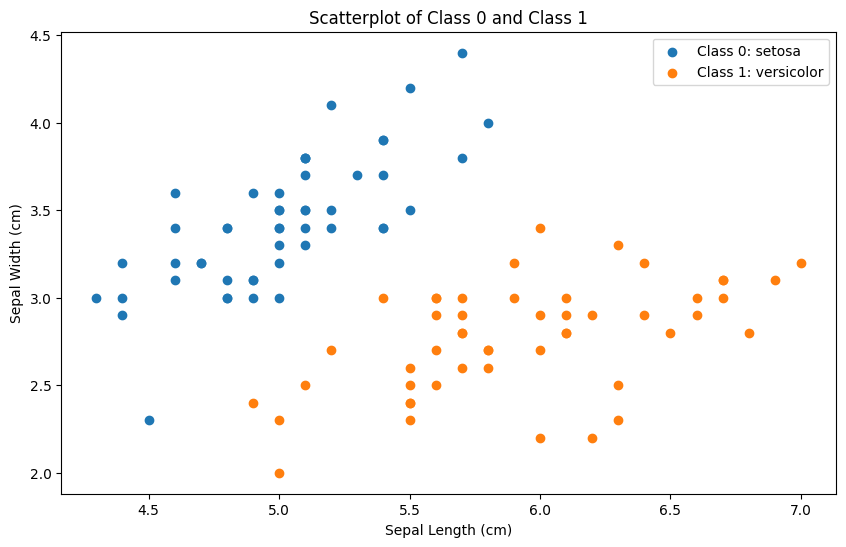

In [6]:
import matplotlib.pyplot as plt 

# Create the graph & add scatters by group target
plt.figure(figsize=(10, 6))
for target in np.unique(y):
    subset = X[y == target]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Class {target}: {iris.target_names[target]}')

# Add graph elements
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatterplot of Class 0 and Class 1')
plt.legend()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [7]:
# Create train & test dataset from filtered data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Use SVM classifier
C_values = range(0, 200+1, 25)
for C in C_values:
    if C==0: continue
    SVMmodel = SVC(kernel='linear', C=C)
    SVMmodel.fit(X_train, y_train)
    accuracy = SVMmodel.score(X_test, y_test)
    print(f'Accuracy (C={C}): {accuracy:.2f}')

Accuracy (C=25): 1.00
Accuracy (C=50): 1.00
Accuracy (C=75): 1.00
Accuracy (C=100): 1.00
Accuracy (C=125): 1.00
Accuracy (C=150): 1.00
Accuracy (C=175): 1.00
Accuracy (C=200): 1.00


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

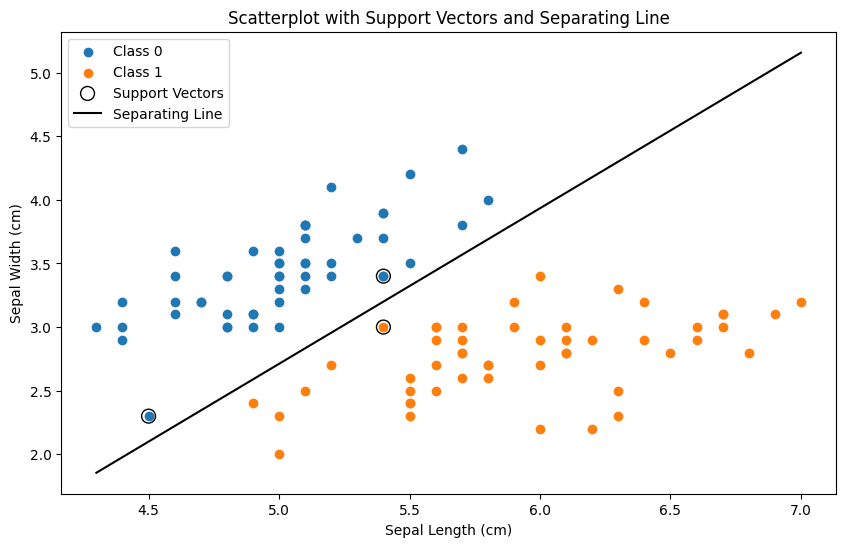

In [8]:
# Get support vectors, coefs & the intercept
supvectors = SVMmodel.support_vectors_
W = SVMmodel.coef_[0]
b = SVMmodel.intercept_[0]

# Plot the support vectors
plt.figure(figsize=(10, 6))
for target in np.unique(y):
    subset = X[y == target]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Class {target}')
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

#Separating line coefficients
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(W[0] * x_values + b) / W[1]
plt.plot(x_values, y_values, 'k-', label='Separating Line')

# Add graph elements
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatterplot with Support Vectors and Separating Line')
plt.legend()
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

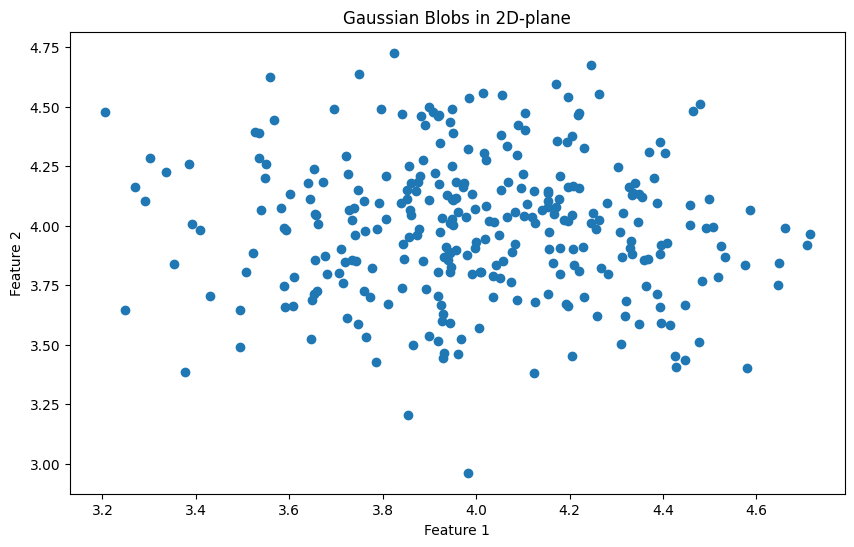

In [9]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.figure(figsize=(10, 6))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Blobs in 2D-plane')
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

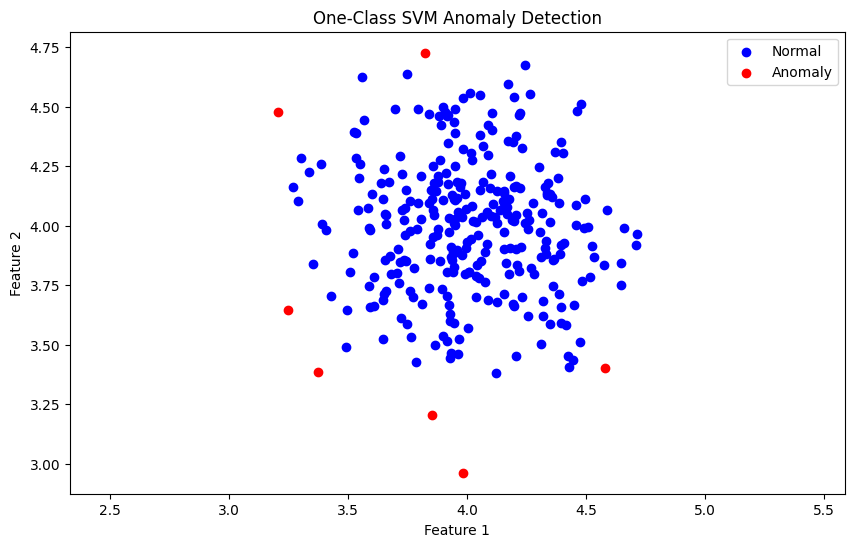

In [10]:
# Train One-Class SVM
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
SVMmodelOne.fit(x)

# Finding abnormal values
pred = SVMmodelOne.predict(x)
normal = where(pred==1)
anomaly = where(pred==-1)

# Print graph
plt.figure(figsize=(10, 6))
plt.scatter(x[normal][:, 0], x[normal][:, 1], label='Normal', color='b')
plt.scatter(x[anomaly][:, 0], x[anomaly][:, 1], label='Anomaly', color='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('One-Class SVM Anomaly Detection')
plt.axis('equal')
plt.legend()
plt.show()

Plot the support vectors:

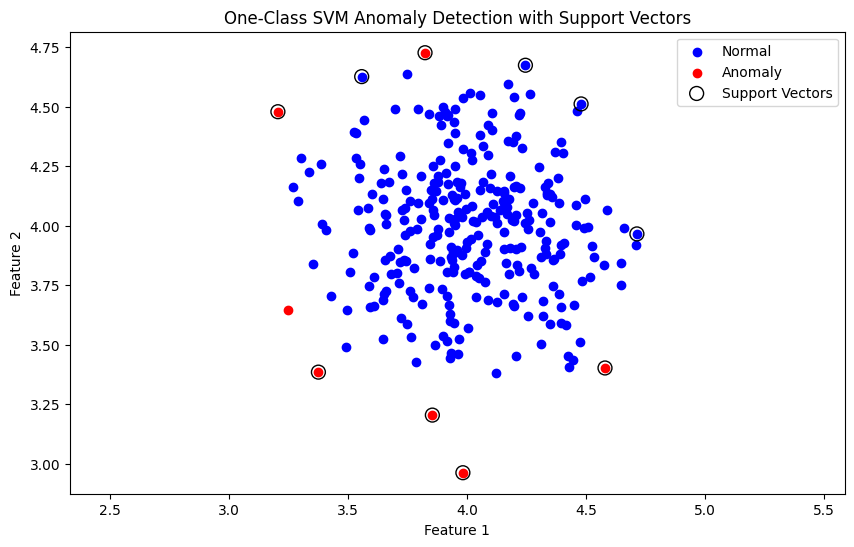

In [11]:
# Get support vectors, coefs & the intercept
supvectors = SVMmodelOne.support_vectors_

# Plot the support vectors
plt.figure(figsize=(10, 6))
plt.scatter(x[normal][:, 0], x[normal][:, 1], label='Normal', color='b')
plt.scatter(x[anomaly][:, 0], x[anomaly][:, 1], label='Anomaly', color='r')
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('One-Class SVM Anomaly Detection with Support Vectors')
plt.axis('equal')
plt.legend()
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.99269220494228


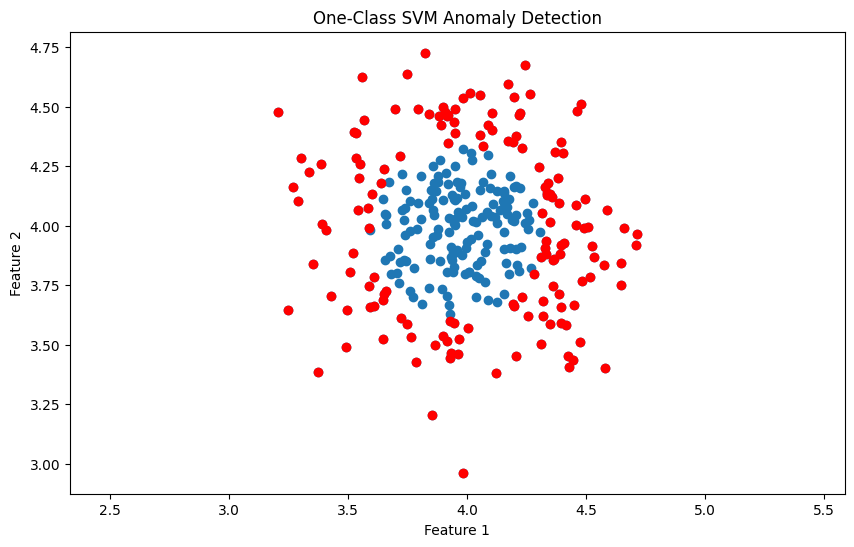

In [12]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.5)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.figure(figsize=(10, 6))
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('One-Class SVM Anomaly Detection')
plt.axis('equal')
plt.show()